# Reading the data

In [2]:
# UPLOADING DATA FILE

from google.colab import files

upload = files.upload()

Saving Coal Consumption.csv to Coal Consumption (1).csv


In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('Coal Consumption.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Types of coal,Coal consuming sectors,Coal consumed
0,1,India,1,Jammu And Kashmir,2011,RAW COAL,CEMENT,0.051000
1,2,India,1,Jammu And Kashmir,2011,RAW COAL,OTHER,0.108000
2,3,India,1,Jammu And Kashmir,2012,RAW COAL,BRICKS,0.017000
3,4,India,1,Jammu And Kashmir,2012,RAW COAL,CEMENT,0.030000
4,5,India,1,Jammu And Kashmir,2012,RAW COAL,OTHER,0.044000
...,...,...,...,...,...,...,...,...
1979,1980,India,37,Ladakh,2018,RAW COAL,OTHER,0.000740
1980,1981,India,37,Ladakh,2019,RAW COAL,CEMENT,0.000000
1981,1982,India,37,Ladakh,2019,RAW COAL,OTHER,0.000000
1982,1983,India,37,Ladakh,2020,RAW COAL,CEMENT,0.000152


# Some basic insights into data

In [6]:
df.describe()

,Rowid,State lgd code,Year,Coal consumed
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,992.500000,20.504536,2015.294355,3.294219
std,572.875786,9.303965,2.836448,9.316642
min,1.000000,1.000000,2011.000000,0.000000
25%,496.750000,17.000000,2013.000000,0.034000
50%,992.500000,21.000000,2015.000000,0.206000
75%,1488.250000,27.000000,2018.000000,1.316500
max,1984.000000,37.000000,2020.000000,79.342000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rowid                   1984 non-null   int64  
 1   Country                 1984 non-null   object 
 2   State lgd code          1984 non-null   int64  
 3   State                   1984 non-null   object 
 4   Year                    1984 non-null   int64  
 5   Types of coal           1984 non-null   object 
 6   Coal consuming sectors  1984 non-null   object 
 7   Coal consumed           1984 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 124.1+ KB


In [8]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                     0
Country                   0
State lgd code            0
State                     0
Year                      0
Types of coal             0
Coal consuming sectors    0
Coal consumed             0
dtype: int64


So there are no null entries in our data. 

In [9]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 1984 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 26 unique values
Column "State" has 26 unique values
Column "Year" has 10 unique values
Column "Types of coal" has 4 unique values
Column "Coal consuming sectors" has 17 unique values
Column "Coal consumed" has 1112 unique values


# Statewise Consumption

In [10]:
states=df['State'].unique()
print(states)

['Jammu And Kashmir' 'Himachal Pradesh' 'Punjab' 'Uttarakhand' 'Haryana'
 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Bihar' 'Arunachal Pradesh'
 'Meghalaya' 'Assam' 'West Bengal' 'Jharkhand' 'Odisha' 'Chhattisgarh'
 'Madhya Pradesh' 'Gujarat' 'Maharashtra' 'Andhra Pradesh' 'Karnataka'
 'Goa' 'Kerala' 'Tamil Nadu' 'Telangana' 'Ladakh']


In [11]:
state_consumption=np.zeros(26)
print(state_consumption)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [12]:
df2 = df.groupby('State').apply(lambda x: x['Coal consumed'].unique().sum())
print(df2)

State
Andhra Pradesh       338.627627
Arunachal Pradesh      0.647000
Assam                  6.532000
Bihar                124.998000
Chhattisgarh         733.621000
Delhi                 28.926000
Goa                    0.100000
Gujarat              308.731000
Haryana              148.562000
Himachal Pradesh       2.399000
Jammu And Kashmir      0.476215
Jharkhand            399.740000
Karnataka            133.601000
Kerala                 0.873000
Ladakh                 0.001785
Madhya Pradesh       581.180000
Maharashtra          523.023000
Meghalaya             36.059000
Odisha               681.643000
Punjab               142.116000
Rajasthan            274.694000
Tamil Nadu           429.820000
Telangana            300.964373
Uttar Pradesh        773.388000
Uttarakhand            8.216000
West Bengal          511.018000
dtype: float64


In [13]:
df1=df2.sort_values()
print(df1)

State
Ladakh                 0.001785
Goa                    0.100000
Jammu And Kashmir      0.476215
Arunachal Pradesh      0.647000
Kerala                 0.873000
Himachal Pradesh       2.399000
Assam                  6.532000
Uttarakhand            8.216000
Delhi                 28.926000
Meghalaya             36.059000
Bihar                124.998000
Karnataka            133.601000
Punjab               142.116000
Haryana              148.562000
Rajasthan            274.694000
Telangana            300.964373
Gujarat              308.731000
Andhra Pradesh       338.627627
Jharkhand            399.740000
Tamil Nadu           429.820000
West Bengal          511.018000
Maharashtra          523.023000
Madhya Pradesh       581.180000
Odisha               681.643000
Chhattisgarh         733.621000
Uttar Pradesh        773.388000
dtype: float64


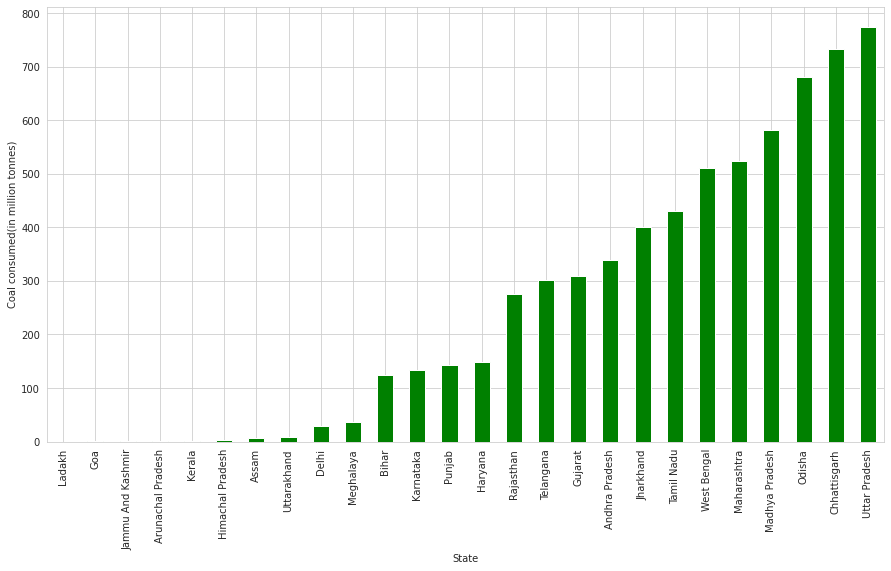

In [14]:
df1.plot(kind='bar', y='Coal consumed',figsize=(15,8),ylabel='Coal consumed(in million tonnes)',color='green')

# Year Wise Consumption

In [17]:
dfy = df.groupby('Year').apply(lambda x: x['Coal consumed'].unique().sum())
print(dfy)

Year
2011    553.435
2012    571.674
2013    609.056
2014    592.021
2015    633.744
2016    650.638
2017    669.337
2018    714.387
2019    777.172
2020    750.019
dtype: float64


Text(0, 0.5, 'Coal Consumption (in million tonnes)')

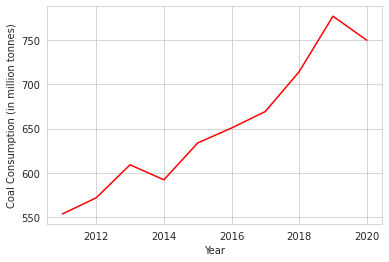

In [18]:
plt.plot(dfy,'red')
plt.xlabel("Year")
plt.ylabel("Coal Consumption (in million tonnes)")

# Sector wise consumption

In [31]:
dfs = df.groupby('Coal consuming sectors').apply(lambda x: x['Coal consumed'].unique().sum())
print(dfs)

Coal consuming sectors
BRICKS                                 13.288
CEMENT                                106.341
CHEMICAL                                7.063
COKERIES                                3.149
COLLIERY OWN - CONSUMPTION              1.571
COLLIERY STAFF                          0.002
FERTILISERS                            22.104
METALLURGICAL USE- COKERIES            47.792
METALLURGICAL USE- DIRECT FEED         14.926
OTHER                                 582.021
OTHER BASIC-METAL (ALUMINIUM ETC)       7.539
POWER (CAPTIVE)                      1268.831
POWER (UTILITY)                      4228.379
PULP & PAPER                           24.322
SPONGE IRON                           127.813
STEEL (BOILERS)                         7.721
TEXTILES & RAYONS                      22.367
dtype: float64


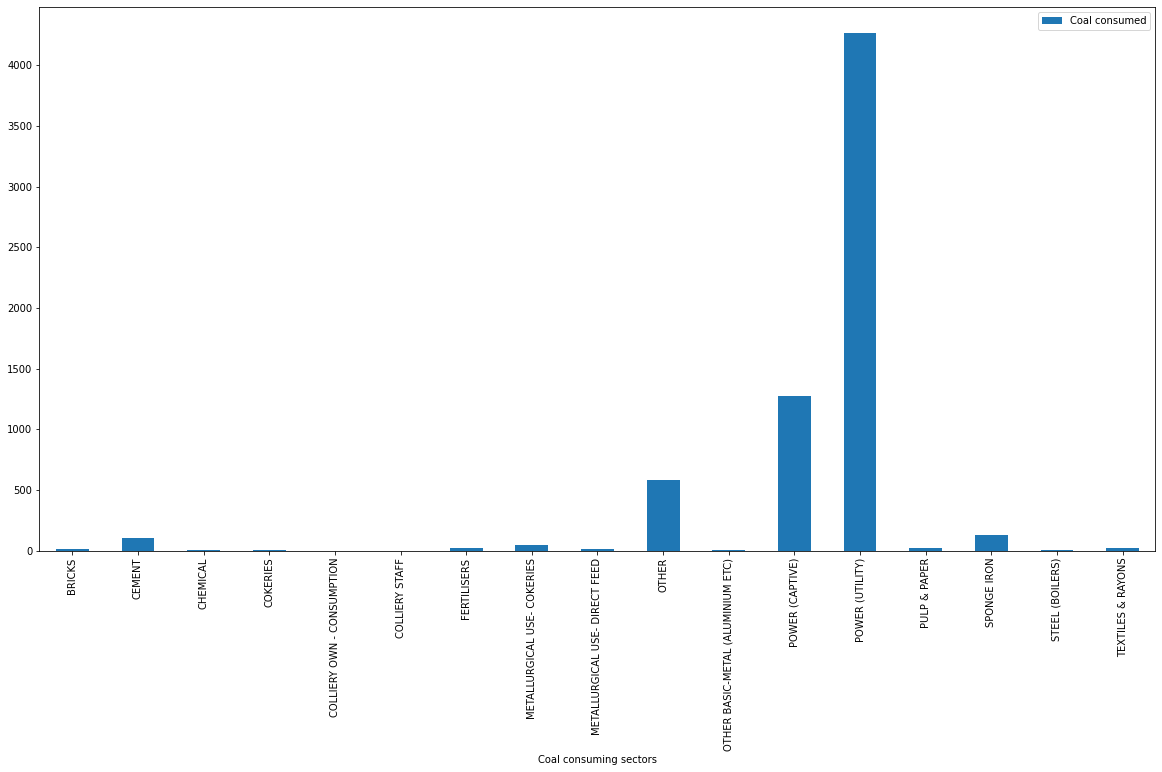

In [49]:
df.groupby(['Coal consuming sectors']).sum().plot(kind='bar', y='Coal consumed',figsize=(20,10))

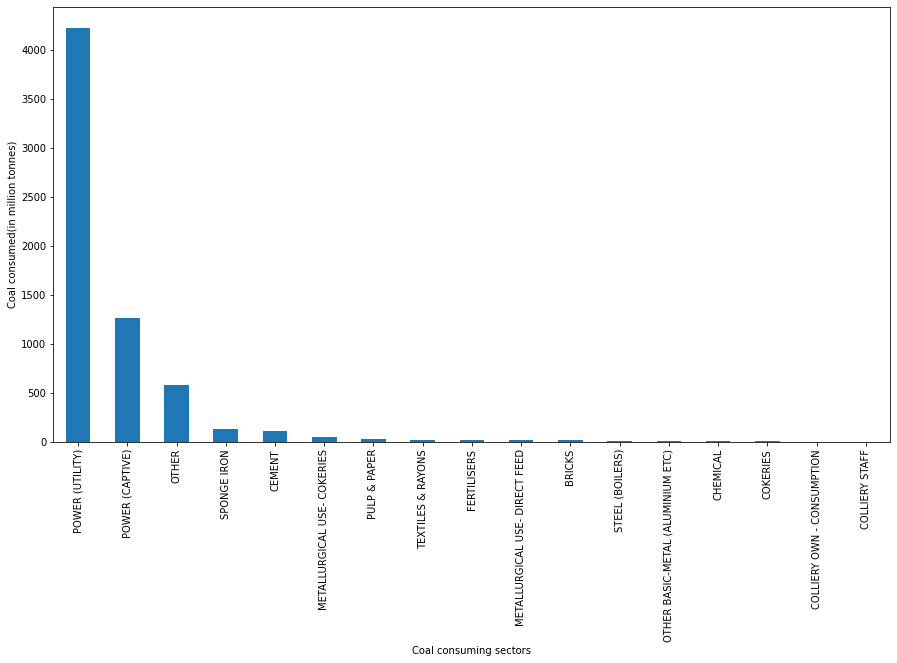

In [58]:
dfs.sort_values(ascending=False).plot(kind='bar', y='Coal consumed',figsize=(15,8),ylabel='Coal consumed(in million tonnes)')

# Typewise Consumption

In [37]:
dft = df.groupby('Types of coal').apply(lambda x: x['Coal consumed'].unique().sum())
print(dft)

Types of coal
LIGNITE         435.184
MIDDLINGS        65.078
RAW COAL       5732.408
WASHED COAL     210.366
dtype: float64


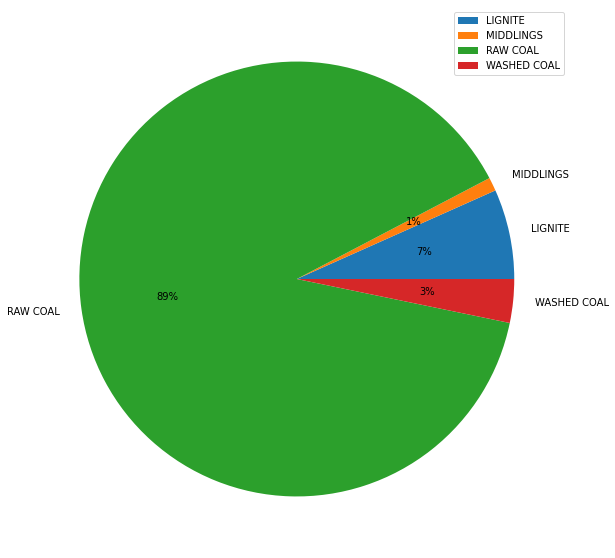

In [44]:
df.groupby(['Types of coal']).sum().plot(kind='pie', y='Coal consumed',autopct='%1.0f%%',figsize=(10,10),ylabel=" ")